# Steam Predicter

In [52]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cleaning datasets




In [53]:
DATASET_PATH = os.path.join("datasets")

In [54]:
def load_data(filename, path):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [55]:
steam_data = load_data("steam_data.csv", DATASET_PATH)
text_data = load_data("text_content.csv", DATASET_PATH)
steam_db = load_data("steam.csv", DATASET_PATH)
dataset2 = load_data("steamspy_tag_data.csv", DATASET_PATH)
dataset3 = load_data("steam_support_info.csv", DATASET_PATH)
dataset4 = load_data("steam_requirements_data.csv", DATASET_PATH)
dataset5 = load_data("steam_media_data.csv", DATASET_PATH)
dataset6 = load_data("steam_description_data.csv", DATASET_PATH)

# Datasets
Let's take a look at datasets. We want to predict the overall user score based on `all_reviews` column found in `steam_data.csv`. However, we don't have enough useful data in this data set, so we will take a look at other datasets:

* `text_content.csv` contains games descriptions and popular tags given by the community.
* `steam.csv` contains a lot of useful data such as genres, playtime and number of owners.
* `steam_description_data.csv` contains a much more detailed description of games.

We would link datasets through appid - unique identifier of every game available on Steam.


In [56]:
steam_data.head()

,url,name,categories,img_url,user_reviews,all_reviews,date,developer,publisher,price,pegi,pegi_url
0,https://store.steampowered.com/app/945360/Amon...,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,https://steamcdn-a.akamaihd.net/steam/apps/945...,"Overwhelmingly Positive(151,281)- 96% of the 1...","Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-,-
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"Very Positive(90,780)- 88% of the 90,780 user ...","Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,-,-
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,https://steamcdn-a.akamaihd.net/steam/apps/109...,"Very Positive(32,436)- 84% of the 32,436 user ...","Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-,-
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,https://steamcdn-a.akamaihd.net/steam/apps/115...,"Very Positive(5,359)- 91% of the 5,359 user re...","Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of...,https://steamstore-a.akamaihd.net/public/share...
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,https://steamcdn-a.akamaihd.net/steam/apps/108...,"Very Positive(9,147)- 87% of the 9,147 user re...","Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence,https://steamstore-a.akamaihd.net/public/share...


In [57]:
text_data.head()

,url,desc,full_desc,requirements,popu_tags
0,https://store.steampowered.com/app/945360/Amon...,An online and local party game of teamwork and...,About This GamePlay with 4-10 player online or...,System RequirementsMinimum:OS: Windows 7 SP1+P...,MultiplayerOnline Co-OpSpaceSocial DeductionSu...
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,About This GameCounter-Strike: Global Offensiv...,System RequirementsWindowsMac OS XSteamOS + Li...,FPSShooterMultiplayerCompetitiveActionTeam-Bas...
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys is a massively multiplayer party gam...,About This GameFall Guys: Ultimate Knockout fl...,System RequirementsMinimum:Requires a 64-bit p...,MultiplayerFunnyBattle RoyaleOnline Co-OpFamil...
3,https://store.steampowered.com/app/1158310/Cru...,Paradox Development Studio brings you the sequ...,About This GameParadox Development Studio brin...,System RequirementsWindowsMac OS XSteamOS + Li...,StrategyRPGSimulationMedievalGrand StrategyHis...
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2 is an action MMO with a single evolv...,About This GameDive into the world of Destiny ...,System RequirementsMinimum:Requires a 64-bit p...,Free to PlayLooter ShooterMultiplayerFPSAction...


In [58]:
steam_db.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [59]:
dataset2.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
dataset3.head()

,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN


In [61]:
dataset4.head()

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [62]:
dataset5.head()

,steam_appid,header_image,screenshots,background,movies
0,10,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN
1,20,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN
2,30,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,NaN
3,40,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN
4,50,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,NaN


In [63]:
dataset6.head()

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


## Cleaning data

Extract appid from url and delete all items that aren't games (like bundles).

In [64]:
# https://store.steampowered.com/app/945360/Among_Us/?snr=1_7_7_230_150_1  <- how url look like
def clean_url(url):
    url_left = url.split("app/")
    if len(url_left) < 2:
        return np.NaN # return NaN if it isn't the game
    url_left = url_left[1].split("/")

    return url_left[0]

def clean_dataset_url(dataset):
    dataset.url = dataset.url.apply(lambda x : clean_url(x))

    dataset = dataset.drop(dataset[dataset.url == np.NaN].index)

    return dataset


In [65]:
steam_data = clean_dataset_url(steam_data)
steam_data.head()

,url,name,categories,img_url,user_reviews,all_reviews,date,developer,publisher,price,pegi,pegi_url
0,945360,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,https://steamcdn-a.akamaihd.net/steam/apps/945...,"Overwhelmingly Positive(151,281)- 96% of the 1...","Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-,-
1,730,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"Very Positive(90,780)- 88% of the 90,780 user ...","Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,-,-
2,1097150,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,https://steamcdn-a.akamaihd.net/steam/apps/109...,"Very Positive(32,436)- 84% of the 32,436 user ...","Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-,-
3,1158310,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,https://steamcdn-a.akamaihd.net/steam/apps/115...,"Very Positive(5,359)- 91% of the 5,359 user re...","Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of...,https://steamstore-a.akamaihd.net/public/share...
4,1085660,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,https://steamcdn-a.akamaihd.net/steam/apps/108...,"Very Positive(9,147)- 87% of the 9,147 user re...","Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence,https://steamstore-a.akamaihd.net/public/share...


In [66]:
text_data = clean_dataset_url(text_data)
text_data.head()

,url,desc,full_desc,requirements,popu_tags
0,945360,An online and local party game of teamwork and...,About This GamePlay with 4-10 player online or...,System RequirementsMinimum:OS: Windows 7 SP1+P...,MultiplayerOnline Co-OpSpaceSocial DeductionSu...
1,730,Counter-Strike: Global Offensive (CS: GO) expa...,About This GameCounter-Strike: Global Offensiv...,System RequirementsWindowsMac OS XSteamOS + Li...,FPSShooterMultiplayerCompetitiveActionTeam-Bas...
2,1097150,Fall Guys is a massively multiplayer party gam...,About This GameFall Guys: Ultimate Knockout fl...,System RequirementsMinimum:Requires a 64-bit p...,MultiplayerFunnyBattle RoyaleOnline Co-OpFamil...
3,1158310,Paradox Development Studio brings you the sequ...,About This GameParadox Development Studio brin...,System RequirementsWindowsMac OS XSteamOS + Li...,StrategyRPGSimulationMedievalGrand StrategyHis...
4,1085660,Destiny 2 is an action MMO with a single evolv...,About This GameDive into the world of Destiny ...,System RequirementsMinimum:Requires a 64-bit p...,Free to PlayLooter ShooterMultiplayerFPSAction...


Extract % of positive reviews from `user_reviews` column.

In [67]:
# Very Positive(4,843,904)- 87% of the 4,843,904 user reviews for this game are positive. <- sample
def clean_reviews(reviews_string):
    if type(reviews_string) is not str:
        return np.NaN
        
    m = re.search("- (.+?)%", reviews_string)
    if m:
        return int(m.group(1))
    else:
        return np.NaN

In [68]:
steam_data.user_reviews = steam_data.user_reviews.apply(lambda x : clean_reviews(x))

steam_data.all_reviews = steam_data.all_reviews.apply(lambda x : clean_reviews(x))

steam_data = steam_data.drop(steam_data[steam_data.url == np.NaN].index)

steam_data.head()

,url,name,categories,img_url,user_reviews,all_reviews,date,developer,publisher,price,pegi,pegi_url
0,945360,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,https://steamcdn-a.akamaihd.net/steam/apps/945...,96.0,95.0,"Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-,-
1,730,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,https://steamcdn-a.akamaihd.net/steam/apps/730...,88.0,87.0,"Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,-,-
2,1097150,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,https://steamcdn-a.akamaihd.net/steam/apps/109...,84.0,80.0,"Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-,-
3,1158310,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,https://steamcdn-a.akamaihd.net/steam/apps/115...,91.0,92.0,"Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of...,https://steamstore-a.akamaihd.net/public/share...
4,1085660,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,https://steamcdn-a.akamaihd.net/steam/apps/108...,87.0,86.0,"Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence,https://steamstore-a.akamaihd.net/public/share...


Combine `steam_data` and `text_content` datasets.

In [69]:
steam_data = steam_data.merge(text_data, how="inner", on="url", sort=True)

steam_data = steam_data.drop_duplicates(subset="url", keep="first")

steam_data.head()

,url,name,categories,img_url,user_reviews,all_reviews,date,developer,publisher,price,pegi,pegi_url,desc,full_desc,requirements,popu_tags
0,10,Counter-Strike,Online PvPShared/Split Screen PvPValve Anti-Ch...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,97.0,96.0,"Nov 1, 2000",Valve,Valve,Buy Counter-Strike: Condition ZeroIncludes 2 i...,-,-,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,System RequirementsWindowsMac OS XSteamOS + Li...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...
1,1000000,ASCENXION,Single-playerPartial Controller SupportSteam i...,https://steamcdn-a.akamaihd.net/steam/apps/100...,NaN,NaN,Winter 2020,IndigoBlue Game Studio,-,Download ASCENXION DEMODownload Demo (Language...,-,-,'ASCENXION' is a game combining shoot 'em up a...,About This Game'ASCENXION' is a game combining...,System RequirementsMinimum:OS: Windows 7 / 8 /...,ActionAdventureIndieShoot 'Em UpMetroidvaniaSh...
10,1000010,Crown Trick,Single-playerSteam AchievementsSteam Trading C...,https://steamcdn-a.akamaihd.net/steam/apps/100...,80.0,NaN,"16 Oct, 2020",NEXT Studios,-,Buy Crown TrickSPECIAL PROMOTION! Offer ends 2...,-,-,"Enter a labyrinth that moves as you move, wher...",About This GameCrown Trick is a beautifully an...,System RequirementsMinimum:OS: Windows 7 (32-b...,RoguelikeTurn-Based CombatRPGPerma DeathRoguel...
14,1000030,"Cook, Serve, Delicious! 3?!",Single-playerShared/Split Screen Co-opSteam Ac...,https://steamcdn-a.akamaihd.net/steam/apps/100...,95.0,96.0,"Oct 14, 2020",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Buy Cook, Serve, Delicious! 3?!$19.99Add to Cart",Use of AlcoholFantasy Violence,https://steamstore-a.akamaihd.net/public/share...,"Cook, serve and manage your food truck as you ...",About This GameHit the road in this massive se...,System RequirementsMinimum:OS: Windows 7/8/10...,TypingCasualManagementDifficultArcadeStrategy2...
15,1000040,细胞战争,Single-playerProfile Features Limited,https://steamcdn-a.akamaihd.net/steam/apps/100...,NaN,NaN,"30 Mar, 2019",DoubleC Games,-,Buy 细胞战争NT$ 45Add to Cart,-,-,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,About This Game这款游戏以人体内部为背景，作为侵入人体的细菌，你需要从一个器官...,System RequirementsMinimum:Requires a 64-bit p...,ActionCasualIndieSimulation+


Delete unnecessary columns, delete null values and change "url" to "appid" and convert it to numeric.

In [70]:
steam_data = steam_data.drop(columns=["categories", "img_url", "developer", "all_reviews", "publisher", "price", "pegi", "pegi_url", "requirements", "date", "name"])

steam_data = steam_data.drop(steam_data[steam_data.user_reviews.isnull().values].index)

steam_data = steam_data.rename(columns={"url" : "appid"})

steam_data.appid = pd.to_numeric(steam_data.appid)

steam_data.head()

,appid,user_reviews,desc,full_desc,popu_tags
0,10,97.0,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...
10,1000010,80.0,"Enter a labyrinth that moves as you move, wher...",About This GameCrown Trick is a beautifully an...,RoguelikeTurn-Based CombatRPGPerma DeathRoguel...
14,1000030,95.0,"Cook, serve and manage your food truck as you ...",About This GameHit the road in this massive se...,TypingCasualManagementDifficultArcadeStrategy2...
16,1000080,73.0,Zengeon is an anime infused Action RPG and Rog...,About This GameZengeon is a style-bursting col...,ActionIndieRPGAdventureAction RoguelikeAnimeAc...
17,1000110,61.0,Jumping Master is a innovative casual competit...,About This GameBased on the unique designed mu...,Free to PlayMassively MultiplayerActionAdventu...


Combine `steam_data` and `steam_db` datasets.

In [71]:
whole_steam_data = steam_data.merge(steam_db, how="inner", on="appid", sort=True)

whole_steam_data = whole_steam_data.drop_duplicates(subset="appid", keep="first")

whole_steam_data

,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,publisher,...,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,97.0,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,Valve,...,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,90.0,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,Valve,...,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,85.0,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,Valve,...,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,70.0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,Valve,...,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,94.0,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,...,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,1063560,64.0,The protagonist was in a very nightmarish and ...,About This GameIndie horor from the first pers...,ActionIndieSimulationViolentPsychological Horr...,12 HOURS,2019-04-24,1,Second Reality,Second Reality,...,Single-player,Action;Indie;Simulation;Early Access,Early Access;Action;Indie,0,9,1,0,0,0-20000,2.09
17412,1064060,57.0,Solve puzzles and meet beautiful women in this...,"About This GameThis game is a point and click,...",Sexual ContentNudityAdventureIndieCasualRPG+,The Mystery of Bikini Island,2019-04-24,1,Velvet Paradise Games,Velvet Paradise Games,...,Single-player,Adventure;Casual;Indie;RPG;Early Access,Early Access;Adventure;Sexual Content,0,3,0,0,0,0-20000,0.79
17413,1064580,100.0,"In the game CaptainMarlene, you control the sp...",About This GameIn the game you control the spa...,IndieAdventureCasualArcadePlatformerActionEarl...,CaptainMarlene,2019-04-23,1,Dnovel,Dnovel,...,Single-player,Adventure;Indie;Early Access,Early Access;Indie;Adventure,0,13,0,0,0,0-20000,9.29
17414,1065230,53.0,The Room of Pandora is a third-person interact...,About This GameThis is my first indie game on ...,PuzzleInvestigationPoint & ClickHidden ObjectM...,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,...,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09


Delete unnecessary columns from dataset.

In [72]:
whole_steam_data = whole_steam_data.drop(columns=["positive_ratings", "negative_ratings"])

whole_steam_data.columns

Index(['appid', 'user_reviews', 'desc', 'full_desc', 'popu_tags', 'name',
       'release_date', 'english', 'developer', 'publisher', 'platforms',
       'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [73]:
whole_steam_data.head()

,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,price
0,10,97.0,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,17612,317,10000000-20000000,7.19
1,20,90.0,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,277,62,5000000-10000000,3.99
2,30,85.0,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,187,34,5000000-10000000,3.99
3,40,70.0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,258,184,5000000-10000000,3.99
4,50,94.0,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,624,415,5000000-10000000,3.99


Since there are only three platforms - Windows, Mac and Linux, we can make them new columns.

In [74]:
whole_steam_data.insert(10, "windows", 0)
whole_steam_data.insert(11, "mac", 0)
whole_steam_data.insert(12, "linux", 0)

whole_steam_data.head()

,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,publisher,...,platforms,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,price
0,10,97.0,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,Valve,...,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,17612,317,10000000-20000000,7.19
1,20,90.0,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,Valve,...,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,277,62,5000000-10000000,3.99
2,30,85.0,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,Valve,...,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,187,34,5000000-10000000,3.99
3,40,70.0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,Valve,...,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,258,184,5000000-10000000,3.99
4,50,94.0,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,...,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,624,415,5000000-10000000,3.99


In [75]:
def is_windows(row):
    table = row["platforms"].split(";")
    if "windows" in table:
        return 1
    else:
        return 0

def is_mac(row):
    table = row["platforms"].split(";")
    if "mac" in table:
        return 1
    else:
        return 0

def is_linux(row):
    table = row["platforms"].split(";")
    if "linux" in table:
        return 1
    else:
        return 0

In [76]:
whole_steam_data["windows"] = whole_steam_data.apply(is_windows, axis=1)
whole_steam_data["mac"] = whole_steam_data.apply(is_mac, axis=1)
whole_steam_data["linux"] = whole_steam_data.apply(is_linux, axis=1)

And drop `platforms` column.

In [77]:
whole_steam_data = whole_steam_data.drop(columns=["platforms"])

In [78]:
whole_steam_data.head()

,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,publisher,...,linux,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,price
0,10,97.0,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,Valve,...,1,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,17612,317,10000000-20000000,7.19
1,20,90.0,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,Valve,...,1,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,277,62,5000000-10000000,3.99
2,30,85.0,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,Valve,...,1,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,187,34,5000000-10000000,3.99
3,40,70.0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,Valve,...,1,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,258,184,5000000-10000000,3.99
4,50,94.0,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,...,1,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,624,415,5000000-10000000,3.99


Estimated number of owners is represented as range between two numbers. We will just take mean of those two numbers.

In [79]:
def convert_owners_to_mean(owners_string):
    table = owners_string.split("-")
    
    num_list = [np.int64(table[0]), np.int64(table[1])]

    return np.mean(num_list)
    

In [80]:
whole_steam_data.owners = whole_steam_data.owners.apply(lambda x : convert_owners_to_mean(x))

whole_steam_data.head()

,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,publisher,...,linux,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,price
0,10,97.0,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,Valve,...,1,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,17612,317,15000000.0,7.19
1,20,90.0,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,Valve,...,1,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,277,62,7500000.0,3.99
2,30,85.0,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,Valve,...,1,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,187,34,7500000.0,3.99
3,40,70.0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,Valve,...,1,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,258,184,7500000.0,3.99
4,50,94.0,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,...,1,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,624,415,7500000.0,3.99


Lets take a look at categories and tags.

In [81]:
def gather_data_to_dict(data):
    data_dict = { }

    for i in data:
        splitted = i.split(";")
        for j in splitted:
            if j not in data_dict:
                data_dict[j] = 1
            else:
                data_dict[j] += 1


    return data_dict

In [82]:
categories_dict = gather_data_to_dict(whole_steam_data.categories)
tags_dict = gather_data_to_dict(whole_steam_data.steamspy_tags)

In [83]:
categories_dict = {k: v for k, v in sorted(categories_dict.items(), key=lambda item: item[1], reverse=True)}
tags_dict = {k: v for k, v in sorted(tags_dict.items(), key=lambda item: item[1], reverse=True)}

First look at tags

No handles with labels found to put in legend.


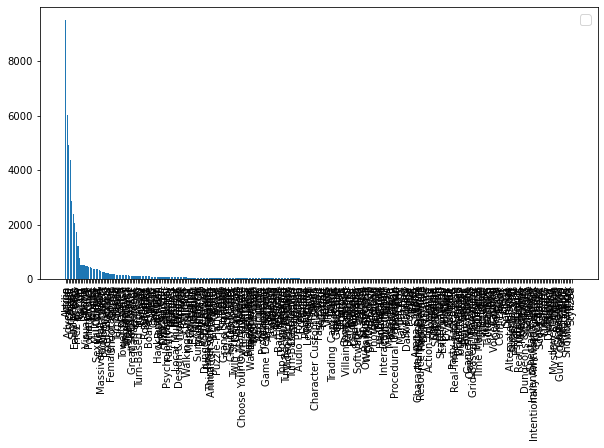

In [84]:
names = list(tags_dict.keys())
values = list(tags_dict.values())

f, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation="vertical")
plt.bar(range(len(tags_dict)), values, tick_label=names)
ax.legend(fontsize = 14)
plt.show()

This plot looks like an eldritch abomination. But we can see that a lot of tags are very unpopular and aren't very important for the prediction. So we will cut tags to the top popular ones.

No handles with labels found to put in legend.


83


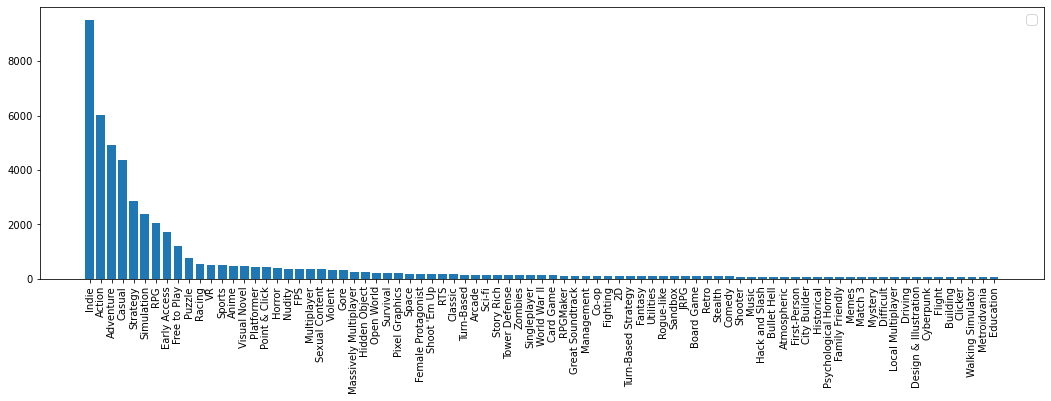

In [85]:
tags_part_dict = dict(list(tags_dict.items())[:len(tags_dict)//4])

print(len(tags_part_dict))

names = list(tags_part_dict.keys())
values = list(tags_part_dict.values())

f, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation="vertical")
plt.bar(range(len(tags_part_dict)), values, tick_label=names)
ax.legend(fontsize = 14)
plt.show()

Now the plot looks fine. Let's add 83 new colums to the dataset and drop 1.

In [86]:
for tag in tags_part_dict:
    whole_steam_data[tag] = [1 if tag in x else 0 for x in whole_steam_data["steamspy_tags"]]

whole_steam_data = whole_steam_data.drop(columns=["steamspy_tags"])

In [87]:
for tag in tags_part_dict:
    print(whole_steam_data[tag].value_counts())

1    9518
0    7898
Name: Indie, dtype: int64
0    11366
1     6050
Name: Action, dtype: int64
0    12476
1     4940
Name: Adventure, dtype: int64
0    13040
1     4376
Name: Casual, dtype: int64
0    14542
1     2874
Name: Strategy, dtype: int64
0    15047
1     2369
Name: Simulation, dtype: int64
0    15313
1     2103
Name: RPG, dtype: int64
0    15691
1     1725
Name: Early Access, dtype: int64
0    16195
1     1221
Name: Free to Play, dtype: int64
0    16607
1      809
Name: Puzzle, dtype: int64
0    16890
1      526
Name: Racing, dtype: int64
0    16894
1      522
Name: VR, dtype: int64
0    16905
1      511
Name: Sports, dtype: int64
0    16929
1      487
Name: Anime, dtype: int64
0    16957
1      459
Name: Visual Novel, dtype: int64
0    16904
1      512
Name: Platformer, dtype: int64
0    16988
1      428
Name: Point & Click, dtype: int64
0    16945
1      471
Name: Horror, dtype: int64
0    17050
1      366
Name: Nudity, dtype: int64
0    17054
1      362
Name: FPS, dtype: in

In [88]:
whole_steam_data.head()

,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,publisher,...,Local Multiplayer,Driving,Design & Illustration,Cyberpunk,Flight,Building,Clicker,Walking Simulator,Metroidvania,Education
0,10,97.0,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
1,20,90.0,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
2,30,85.0,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
3,40,70.0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
4,50,94.0,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,...,0,0,0,0,0,0,0,0,0,0


Now look at categories.

No handles with labels found to put in legend.


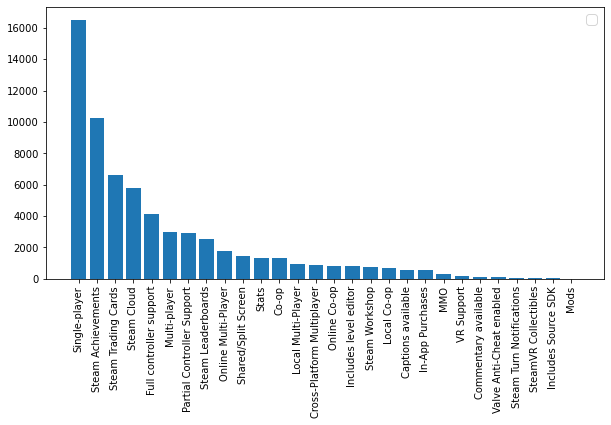

In [89]:
names = list(categories_dict.keys())
values = list(categories_dict.values())

f, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation="vertical")
plt.bar(range(len(categories_dict)), values, tick_label=names)
ax.legend(fontsize = 14)
plt.show()

It looks OK, so we add them to dataset like before.

In [90]:
for cat in categories_dict:
    whole_steam_data[cat] = [1 if cat in x else 0 for x in whole_steam_data["categories"]]

In [91]:
for cat in categories_dict:
    print(whole_steam_data[cat].value_counts())

1    16510
0      906
Name: Single-player, dtype: int64
1    10252
0     7164
Name: Steam Achievements, dtype: int64
0    10783
1     6633
Name: Steam Trading Cards, dtype: int64
0    11642
1     5774
Name: Steam Cloud, dtype: int64
0    13297
1     4119
Name: Full controller support, dtype: int64
0    14429
1     2987
Name: Multi-player, dtype: int64
0    14526
1     2890
Name: Partial Controller Support, dtype: int64
0    14910
1     2506
Name: Steam Leaderboards, dtype: int64
0    15626
1     1790
Name: Online Multi-Player, dtype: int64
0    15987
1     1429
Name: Shared/Split Screen, dtype: int64
0    16094
1     1322
Name: Stats, dtype: int64
0    15527
1     1889
Name: Co-op, dtype: int64
0    16451
1      965
Name: Local Multi-Player, dtype: int64
0    16564
1      852
Name: Cross-Platform Multiplayer, dtype: int64
0    16597
1      819
Name: Online Co-op, dtype: int64
0    16627
1      789
Name: Includes level editor, dtype: int64
0    16665
1      751
Name: Steam Workshop, dty

Change user_reviews to 0 if it is bad review or 1 if it is good review.

In [92]:
def is_good(value):
    if value < 78.0:
        return 0
    else:
        return 1

In [93]:
whole_steam_data.user_reviews = whole_steam_data.user_reviews.apply(lambda x : is_good(x))

In [94]:
whole_steam_data.head()

,appid,user_reviews,desc,full_desc,popu_tags,name,release_date,english,developer,publisher,...,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods
0,10,1,Play the world's number 1 online action game. ...,About This GamePlay the world's number 1 onlin...,ActionFPSMultiplayerShooterClassicTeam-BasedFi...,Counter-Strike,2000-11-01,1,Valve,Valve,...,0,0,0,0,0,1,0,0,0,0
1,20,1,One of the most popular online action games of...,About This GameOne of the most popular online ...,ActionFPSMultiplayerClassicHero ShooterShooter...,Team Fortress Classic,1999-04-01,1,Valve,Valve,...,0,0,0,0,0,1,0,0,0,0
2,30,1,Enlist in an intense brand of Axis vs. Allied ...,About This GameEnlist in an intense brand of A...,FPSWorld War IIMultiplayerShooterActionWarTeam...,Day of Defeat,2003-05-01,1,Valve,Valve,...,0,0,0,0,0,1,0,0,0,0
3,40,0,Enjoy fast-paced multiplayer gaming with Death...,About This GameEnjoy fast-paced multiplayer ga...,ActionFPSClassicMultiplayerShooterFirst-Person...,Deathmatch Classic,2001-06-01,1,Valve,Valve,...,0,0,0,0,0,1,0,0,0,0
4,50,1,Return to the Black Mesa Research Facility as ...,About This GameReturn to the Black Mesa Resear...,FPSActionClassicSci-fiSingleplayerShooterFirst...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,...,0,0,0,0,0,1,0,0,0,0


# Save dataset to file

In [95]:
FINAL_DATASET_PATH = os.path.join("final_dataset", "final_dataset.csv")

whole_steam_data.to_csv(FINAL_DATASET_PATH)